# <font color='red'>Clustering Assignment</font>

**There will be some functions that start with the word "grader" ex: grader_actors(), grader_movies(), grader_cost1() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

**Please check [clustering assignment helper functions](https://drive.google.com/file/d/1V29KhKo3YnckMX32treEgdtH5r90DIjU/view?usp=sharing) notebook before attempting this assignment.**

*  Read graph from the given <font color='blue'>movie_actor_network.csv</font> (note that the graph is bipartite graph.)

*  Using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph. [Refer <font color='blue'>Clustering_Assignment_Reference.ipynb</font>]

* Split the dense representation into actor nodes, movies nodes.(Write you code in <font color='blue'>def data_split()</font>)


# <font color='red'>Task 1 : Apply clustering algorithm to group similar actors</font>

 1. For this task consider only the actor nodes 
 2. Apply any clustering algorithm of your choice <br>
    Refer : https://scikit-learn.org/stable/modules/clustering.html
 3. Choose the number of clusters for which you have maximum score of <b>$Cost1*Cost2$</b><br>
 4. Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters 
<br> (Write your code in <font color='blue'>def cost1()</font>)<br>
 5. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 
 <br> (Write your code in <font color='blue'>def cost2()</font>)<br>
 6. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
 7. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
 8. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color

<img src='https://i.imgur.com/4SPYPFa.jpg'>

# <font color='red'>Task 2 : Apply clustering algorithm to group similar movies</font>


1. For this task consider only the movie nodes
2. Apply any clustering algorithm of your choice
3.Choose the number of clusters for which you have maximum score of $Cost1*Cost2$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br>
(Write your code in <font color='blue'>def cost1()</font>)<br>
	
4. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$ 
where N= number of clusters 
<br>(Write your code in <font color='blue'>def cost2()</font>)<br>


**Algorithm for actor nodes**

<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
        You can get the labels for corresponding actor nodes (algo.labels_)
        Create a graph for every cluster(ie., if n_clusters=3, create 3 graphs)
        (You can use ego_graph to create subgraph from the actual graph)
        compute cost1,cost2 
           (if n_cluster=3, cost1=cost1(graph1)+cost1(graph2)+cost1(graph3) # here we are doing summation
            cost2=cost2(graph1)+cost2(graph2)+cost2(graph3)
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

<br>

In [ ]:
!pip install networkx==2.3
!pip install stellargraph

In [ ]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# you need to have tensorflow 
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_dir = '/content/drive/MyDrive/Colab Notebooks/AAIC_Assignments/solving/12_Clustering on Graph Dataset/movie_actor_network.csv'
# data=pd.read_csv('movie_actor_network.csv', index_col=False, names=['movie','actor'])
data=pd.read_csv(path_dir, index_col=False, names=['movie','actor'])
data.head(5)


,movie,actor
0,m1,a1
1,m2,a1
2,m2,a2
3,m3,a1
4,m3,a3


In [ ]:
data.shape

(9650, 2)

In [ ]:
edges = [tuple(x) for x in data.values.tolist()]
edges[0]

('m1', 'a1')

In [ ]:
len(data['movie'].unique()), len(data['actor'].unique())

(1292, 3411)

In [ ]:
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')

In [ ]:
A = list(nx.connected_component_subgraphs(B))[0]

In [ ]:
print("number of nodes", A.number_of_nodes())
print("number of edges", A.number_of_edges())

number of nodes 4703
number of edges 9650


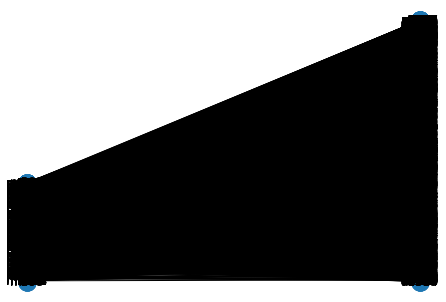

In [ ]:
l, r = nx.bipartite.sets(A)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
  
nx.draw(A, pos=pos, with_labels=True)
plt.show()

In [ ]:
movies = []
actors = []
for i in A.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors))

number of movies  1292
number of actors  3411


In [ ]:

# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(A))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(A.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(walks, size=128, window=5)

In [ ]:
model.wv.vectors.shape  # 128-dimensional vector for each node in the graph

(4703, 128)

In [ ]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ A.node[node_id]['label'] for node_id in node_ids]

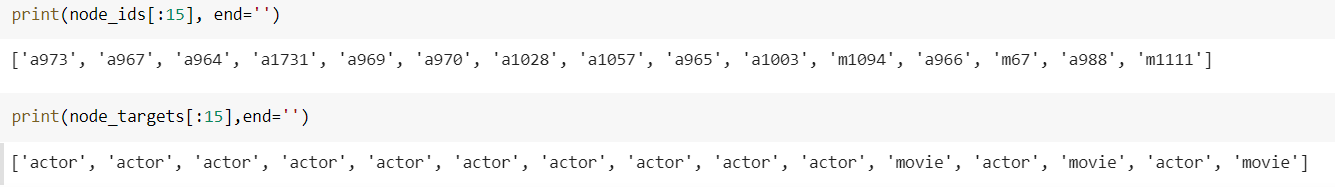

In [ ]:
def data_split(node_ids,node_targets,node_embeddings):
    '''In this function, we will split the node embeddings into actor_embeddings , movie_embeddings '''
    actor_nodes,movie_nodes=[],[]
    actor_embeddings,movie_embeddings=[],[]
    # split the node_embeddings into actor_embeddings,movie_embeddings based on node_ids
    # By using node_embedding and node_targets, we can extract actor_embedding and movie embedding
    # By using node_ids and node_targets, we can extract actor_nodes and movie nodes


    for idx in range(len(node_targets)):
      if node_targets[idx] == 'actor':
        actor_nodes.append(idx)
      else:
        movie_nodes.append(idx)
    actor_embeddings = np.array(node_embeddings[actor_nodes])
    movie_embeddings = np.array(node_embeddings[movie_nodes])
    return actor_nodes,movie_nodes,actor_embeddings,movie_embeddings

actor_nodes, movie_nodes, actor_embeddings, movie_embeddings = data_split(node_ids,node_targets,node_embeddings)
print('Shape of Movie embeddings:',movie_embeddings.shape)
print('Shape of Actor embeddings:',actor_embeddings.shape)


Shape of Movie embeddings: (1292, 128)
Shape of Actor embeddings: (3411, 128)


<font color='cyan'>Grader function - 1</font>

In [ ]:
def grader_actors(data):
    assert(len(data)==3411)
    return True
grader_actors(actor_nodes)

True

<font color='cyan'>Grader function - 2</font>

In [ ]:
def grader_movies(data):
    assert(len(data)==1292)
    return True
grader_movies(movie_nodes)

True

<font color='blue'>Calculating cost1</font>

Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
<br>

In [ ]:
def cost1(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    num_val= max([len(x) for x in list(nx.connected_components(graph))])
    den_val=graph.number_of_nodes() 
    tot_val=num_val/den_val
    cost1= tot_val/number_of_clusters
    return cost1

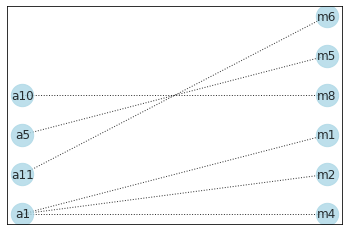

In [ ]:
#ref: https://www.kaggle.com/code/chiragtagadiya/clustering-on-movies-and-actors/notebook

import networkx as nx
from networkx.algorithms import bipartite
graded_graph= nx.Graph()
graded_graph.add_nodes_from(['a1','a5','a10','a11'], bipartite=0) # Add the node attribute "bipartite"
graded_graph.add_nodes_from(['m1','m2','m4','m6','m5','m8'], bipartite=1)
graded_graph.add_edges_from([('a1','m1'),('a1','m2'),('a1','m4'),('a11','m6'),('a5','m5'),('a10','m8')])
l={'a1','a5','a10','a11'};r={'m1','m2','m4','m6','m5','m8'}
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
nx.draw_networkx(graded_graph, pos=pos, with_labels=True,node_color='lightblue',alpha=0.8,style='dotted',node_size=500)

<font color='cyan'>Grader function - 3</font>

In [ ]:
graded_cost1=cost1(graded_graph,3)
def grader_cost1(data):
    assert(data==((1/3)*(4/10))) # 1/3 is number of clusters
    return True
grader_cost1(graded_cost1)

True

<font color='blue'>Calculating cost2</font>

Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 

In [ ]:
def cost2(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    graph_d=graph.degree() 
    num_nodes=list(graph.nodes())

    num_val = sum([graph.degree(idx) for idx in graph.nodes if 'a' in idx])
    den_val = len([idx for idx in graph.nodes if 'm' in idx])
    cost2= num_val/(den_val*number_of_clusters )
    
    return cost2

<font color='cyan'>Grader function - 4</font>

In [ ]:
graded_cost2=cost2(graded_graph,3)
def grader_cost2(data):
    assert(data==((1/3)*(6/6))) # 1/3 is number of clusters
    return True
grader_cost2(graded_cost2)

True

<font color='blue'>Grouping similar actors</font>

In [ ]:
from tqdm.auto import tqdm

In [ ]:
from sklearn.cluster import KMeans
num_clusters = [3, 5, 10, 30, 50, 100, 200, 500]
list_cost = []

for cluster in tqdm(num_clusters[:1]): 
    algo = KMeans(n_clusters= cluster, random_state=0)
    algo.fit(actor_embeddings)
    label = algo.labels_
label

  0%|          | 0/1 [00:00<?, ?it/s]

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
len(label)

3411

In [ ]:
from sklearn.cluster import KMeans
num_clusters = [3, 5, 10, 30, 50, 100, 200, 500]
list_cost = []

for cluster in tqdm(num_clusters): 
    algo = KMeans(n_clusters= cluster, random_state=0)
    algo.fit(actor_embeddings)
    label = algo.labels_

    dic=dict(zip(actor_nodes, label)) 
    test_cost_1=0
    test_cost_2=0

    for i in tqdm(label):
      ac_node = [k for k,v in dic.items() if v == i]
      G1=nx.Graph() 
    
      for n in ac_node:
          sub_graph1 = nx.ego_graph(A, node_ids[n]) 
          G1.add_nodes_from(sub_graph1.nodes) 
          G1.add_edges_from(sub_graph1.edges())
    test_cost_1 += cost1(G1,cluster)
    test_cost_2 += cost2(G1,cluster) 
    print("Value of cost1*cost2 for cluster number "+str(cluster)+" : "+str(test_cost_1*test_cost_2)) 
    list_cost.append(test_cost_1*test_cost_2)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/3411 [00:00<?, ?it/s]

Value of cost1*cost2 for cluster number 3 : 0.4742555662638693


  0%|          | 0/3411 [00:00<?, ?it/s]

Value of cost1*cost2 for cluster number 5 : 0.13520815603452768


  0%|          | 0/3411 [00:00<?, ?it/s]

Value of cost1*cost2 for cluster number 10 : 0.017859304437125075


  0%|          | 0/3411 [00:00<?, ?it/s]

Value of cost1*cost2 for cluster number 30 : 0.00018332020092583473


  0%|          | 0/3411 [00:00<?, ?it/s]

Value of cost1*cost2 for cluster number 50 : 4.64783538609042e-05


  0%|          | 0/3411 [00:00<?, ?it/s]

Value of cost1*cost2 for cluster number 100 : 8.915524937829196e-06


  0%|          | 0/3411 [00:00<?, ?it/s]

Value of cost1*cost2 for cluster number 200 : 9.297754397873182e-07


  0%|          | 0/3411 [00:00<?, ?it/s]

Value of cost1*cost2 for cluster number 500 : 1.0185676392572944e-07


In [ ]:
best_cluster_actor=num_clusters[list_cost.index(max(list_cost))]

print("Maximum product of costs = "+str(max(list_cost)))
print("Maximum value of cost for actors is obtained at:"+str(best_cluster_actor))

Maximum product of costs = 0.4742555662638693
Maximum value of cost for actors is obtained at:3


In [ ]:
algo_actor=KMeans(n_clusters=best_cluster_actor) 
algo_actor.fit(actor_embeddings)

KMeans(n_clusters=3)

<font color='blue'>Displaying similar actor clusters</font>

In [ ]:

from sklearn.manifold import TSNE 
transform = TSNE #PCA
trans_actor = transform(n_components=2) 
actor_2d = trans_actor.fit_transform(actor_embeddings)

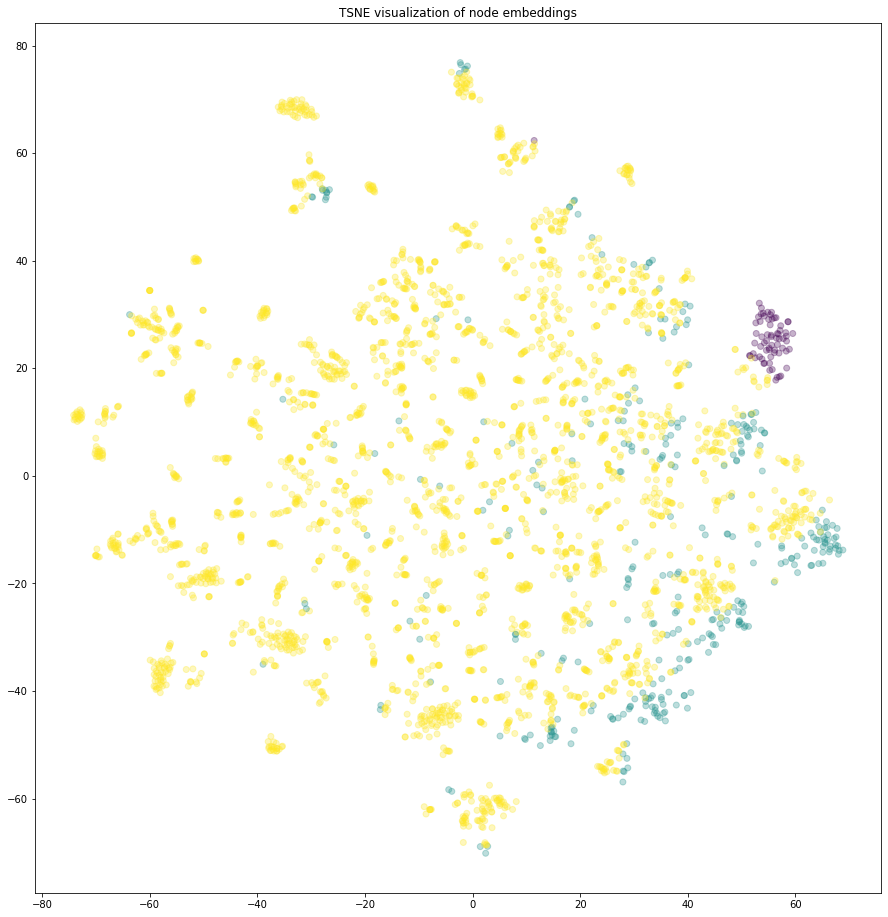

In [ ]:
import numpy as np # draw the points
plt.figure(figsize=(20,16)) 
plt.axes().set(aspect="equal") 
y_kmeans = algo_actor.predict(actor_embeddings)
plt.scatter(actor_2d[:,0], actor_2d[:,1], c=y_kmeans, alpha=0.3)
plt.title('{} visualization of node embeddings'.format(transform.__name__))
plt.show()

<font color='blue'>Grouping similar movies</font>

In [ ]:
cluster_list = [3, 5, 10, 30, 50, 100, 200, 500]
list_Cost_movies  = []

for cluster in tqdm(cluster_list):
    algo_movie     = KMeans(n_clusters=cluster, random_state=0)
    algo_movie.fit(movie_embeddings)
    label_movie    = algo_movie.labels_
    dic       = dict(zip(movie_nodes, label_movie))
    test_cost_1    = 0
    test_cost_2    = 0

    for i in tqdm(label_movie):
        ac_node = [k for k,v in dic.items() if v == i]
        G1      = nx.Graph()
    for n in tqdm(ac_node):
        sub_graph1 = nx.ego_graph(A,node_ids[n]) 
        G1.add_nodes_from(sub_graph1.nodes) 
        G1.add_edges_from(sub_graph1.edges())
    test_cost_1 += cost1(G1,cluster)
    test_cost_2 += cost2(G1,cluster)
    print("Value of cost1*cost2 for cluster number "+str(cluster)+" : "+str(test_cost_1*test_cost_2)) 
    list_Cost_movies.append(test_cost_1*test_cost_2)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1292 [00:00<?, ?it/s]

  0%|          | 0/784 [00:00<?, ?it/s]

Value of cost1*cost2 for cluster number 3 : 0.6698692790725759


  0%|          | 0/1292 [00:00<?, ?it/s]

  0%|          | 0/742 [00:00<?, ?it/s]

Value of cost1*cost2 for cluster number 5 : 0.2458666593321965


  0%|          | 0/1292 [00:00<?, ?it/s]

  0%|          | 0/305 [00:00<?, ?it/s]

Value of cost1*cost2 for cluster number 10 : 0.026212157472777314


  0%|          | 0/1292 [00:00<?, ?it/s]

  0%|          | 0/236 [00:00<?, ?it/s]

Value of cost1*cost2 for cluster number 30 : 0.001707911978350662


  0%|          | 0/1292 [00:00<?, ?it/s]

  0%|          | 0/158 [00:00<?, ?it/s]

Value of cost1*cost2 for cluster number 50 : 0.00025673352435530086


  0%|          | 0/1292 [00:00<?, ?it/s]

  0%|          | 0/142 [00:00<?, ?it/s]

Value of cost1*cost2 for cluster number 100 : 5.8338999514327346e-05


  0%|          | 0/1292 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

Value of cost1*cost2 for cluster number 200 : 1.169208424110385e-05


  0%|          | 0/1292 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

Value of cost1*cost2 for cluster number 500 : 3.628056973931739e-07


<font color='blue'>Displaying similar movie clusters</font>

In [ ]:

best_cluster_movie=cluster_list[list_Cost_movies.index(max(list_Cost_movies))]
print("Maximum product of costs of movie = "+str(max(list_Cost_movies)))
print("Maximum value of cost for actors is obtained at:"+str(best_cluster_movie))

Maximum product of costs of movie = 0.6698692790725759
Maximum value of cost for actors is obtained at:3


In [ ]:

algo_movie=KMeans(n_clusters=best_cluster_movie) 
algo_movie.fit(movie_embeddings)

KMeans(n_clusters=3)

In [ ]:
from sklearn.manifold import TSNE 
transform = TSNE #PCA
trans = transform(n_components=2)
movies_2d = trans.fit_transform(movie_embeddings)

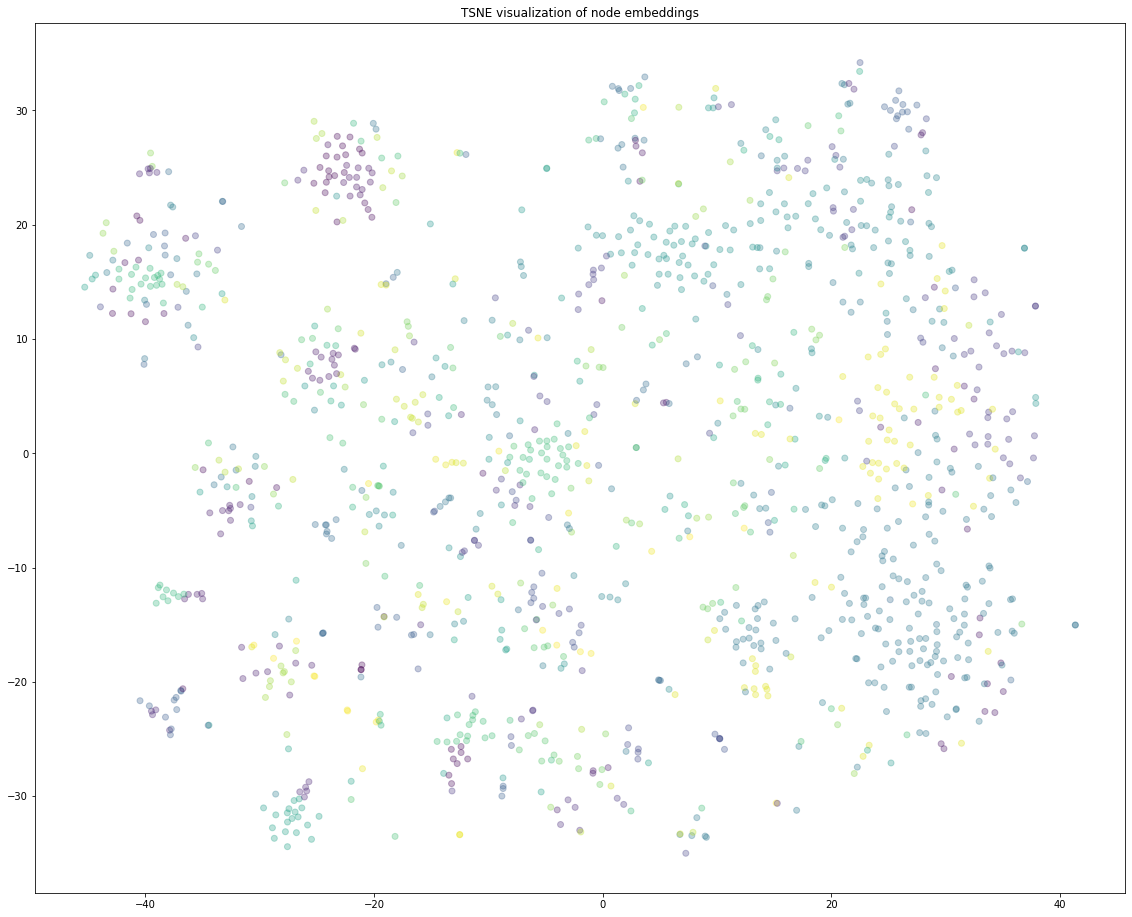

In [ ]:
import numpy as np # draw the points
plt.figure(figsize=(20,16)) 
plt.axes().set(aspect="equal") 
y_kmeansm = algo.predict(movie_embeddings)
plt.scatter(movies_2d[:,0],movies_2d[:,1],c=y_kmeansm, alpha=0.3)
plt.title('{} visualization of node embeddings'.format(transform.__name__))
plt.show()

# `References:`
- https://github.com/cr21/Clustering-on-Movies-and-Actors
- https://www.kaggle.com/code/chiragtagadiya/clustering-on-movies-and-actors/notebook
- https://stackoverflow.com/questions/66636406/apply-clustering-algorithm-to-group-similar-actors

- https://blog.dataiku.com/clustering-actors

